In [7]:
from scraping import login, totals, get_picture_links, scrape_page, users_scrape_save
from transforming import  csvs_to_df, clean_text

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, punkt

import pandas as pd 
import numpy as np
import time
import emoji
import re

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [8]:
data_path = '/Users/keatra/Galvanize/Projects/Instagram_likes_nlp/data'
df_raw = csvs_to_df(data_path)
likes_caption_df  = clean_text(df_raw)
likes_caption_df.head()

,number_of_likes,caption
0,5,[⭐️⭐️]
1,5,"[sometim, good, thing, fall, apart, better, th..."
2,5,"[stori, life]"
3,5,"[it, ’, love, rpiereson]"
4,5,"[miss, sweet, babi, tonight, 👧🏽👶🏽❤️]"


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e4090b8>],
      dtype=object)

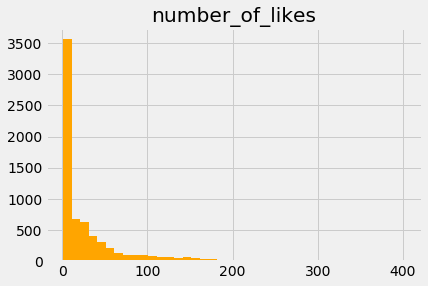

In [9]:
fig, ax3 = plt.subplots()
likes_caption_df.hist(column = 'number_of_likes', ax = ax3, figsize = (8,8), bins = 40, color = 'orange')

In [10]:
corpus = []
for row in likes_caption_df['caption']:
    if row == []:
        corpus.append('')
    else:
        corpus.append(str(' '.join(row)))

In [11]:
#Create a second corpus that is by each word.
# Removes special characters and emojis
corpus_two = []
for i in range(len(corpus)):
    new_string = re.sub('\W+',' ', corpus[i])
    words = word_tokenize(new_string)
    for j in range(len(words)):
            corpus_two.append(words[j])

In [12]:
fdist = FreqDist(word for word in corpus_two)  
fdist.pprint(maxlen=15)

FreqDist({'love': 874, 'day': 587, 'time': 456, 'today': 433, 'get': 385, 'thank': 375, 'happi': 357, 'one': 332, 'go': 320, 'like': 311, 'im': 311, 'life': 304, 'new': 303, 'year': 288, 'got': 273, ...})


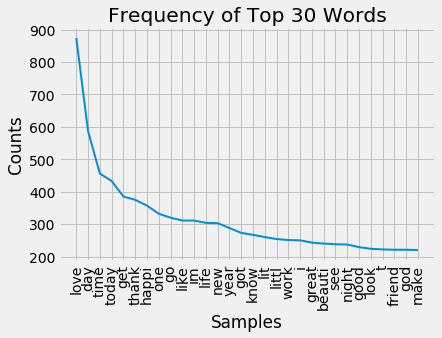

<Figure size 432x288 with 0 Axes>

In [13]:
plt.ion()
fdist.plot(30, title = 'Frequency of Top 30 Words',cumulative=False)
plt.savefig('images/frequency_words.png', facecolor = 'white')
plt.ioff()
plt.show()